If you were approached by a buyer look for a dream house and the buyer gave you all the details of the house from the squarefeet of the house to the roof style of the house. Would you be able to predict the sale price of the buyer's dream home? We have gathered data describing the details of the houses in Ames,Iowa. The objective of this project is to predict the house price of these homes in Ames, Iowa. We will utilize the data from the kaggle competition titled House Pricce: Advanced Regression Techniques. You can find both the competition and the dataset here. https://www.kaggle.com/c/house-prices-advanced-regression-techniques. We will take advantage of machine learning techniques such as random forest, linear regression,SVM and so on. The busines question we need to answer is not limited to predicting sale price but aslo what features influences the price of the house. 

# Data Acquisition and Understanding

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


from scipy import stats
from scipy.stats import norm, skew

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # 3 decimal points


In [2]:
# Uploading data
train_df = pd.read_csv('train.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)

In [3]:
# What does the data look like?
train_df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


The dataset has 1460 entiries and 81 features including the target variable.Out of the 81 features 3 are floats,35 are integers and 43 are objects. Lets take a look at the testing data.

In [6]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.000,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,nan,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.000,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.000,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


We noticed we have missing values in both the training and the test data. We will concatenate the two dataset and do some data cleansing.

In [8]:
alldata = pd.concat([train_df,test_df])
alldata.shape

(2919, 80)

In [9]:
features = alldata.drop('SalePrice', axis = 1)

In [10]:
features_names = list(features.columns)

In [11]:
# Checking for missing data

total = features.isnull().sum().sort_values(ascending=False)
percent_1 = features.isnull().sum()/features.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(81)

,Total,%
1stFlrSF,0,0.000
2ndFlrSF,0,0.000
3SsnPorch,0,0.000
Alley,2721,93.200
BedroomAbvGr,0,0.000
BldgType,0,0.000
BsmtCond,82,2.800
BsmtExposure,82,2.800
BsmtFinSF1,1,0.000
BsmtFinSF2,1,0.000


We are going to delete variables with 90% or more in missing values and then we will look at each variable to figure out what we will do with the missing values. The reason behind deleting variables with a high percentage in missing values is that there is just so many entries missing therefore imputating would take away so much from the original data.

In [12]:
# Deleting variables PoolQC,MiscFeature
del features['PoolQC']
del features['MiscFeature']

In [13]:
features.shape

(2919, 77)

In [14]:
# we have 50% missing values in the target variable. We will replace the missing values with a mean of the column
alldata['SalePrice'] = alldata['SalePrice'].fillna(alldata['SalePrice'].mean())

In [15]:
# In the variable Fence NA means No fence therefore we will replace NA for Nofce- meaning No fence.
features['Fence'] = features["Fence"].fillna('Nofce')

In [16]:
#Same thing applies to the variable Alley. We will replace NA with Noalley meaning No Alley Access.
features['Alley'] = features["Alley"].fillna('Noalley')

In [17]:
# NA means no basement therefore will replace NA with NB
features['BsmtExposure']= features['BsmtExposure'].fillna('NB')

In [18]:
# NA means no basement therefore will replace NA with Nobsmt for No Basement
features['BsmtFinType1'] = features['BsmtFinType1'].fillna('Nobsmt')

In [19]:
# NA means no basement therefore will replace NA with Nobsmt for No Basement
features['BsmtFinType2']= features['BsmtFinType2'].fillna('Nobsmt')

In [20]:
# NA means no basement therefore will replace NA with Nobsmt for No Basement
features['BsmtQual'] = features['BsmtQual'].fillna('Nobsmt')

In [21]:
# NA means no basement therefore will replace NA with Notyp for type none
features['MasVnrType'] = features['MasVnrType'].fillna('Notyp')

In [22]:
# NA means no basement therefore will replace NA with Nobsmt for No Basement
features['BsmtCond'] = features['BsmtCond'].fillna('Nobsmt')

In [23]:
# NA means no fireplace therefore will replace NA with Nf for No fireplace
features['FireplaceQu'] = features['FireplaceQu'].fillna('Nf')


In [24]:
# Fill Zeros with the mean
features['MasVnrArea'] = features['MasVnrArea'].mask(features['MasVnrArea']==0).fillna(features['MasVnrArea'].mean())
features['BsmtFinSF1'] = features['BsmtFinSF1'].mask(features['BsmtFinSF1']==0).fillna(features['BsmtFinSF1'].mean())
features['BsmtFinSF2'] = features['BsmtFinSF2'].mask(features['BsmtFinSF2']==0).fillna(features['BsmtFinSF2'].mean())
features['BsmtUnfSF'] = features['BsmtUnfSF'].mask(features['BsmtUnfSF']==0).fillna(features['BsmtUnfSF'].mean())
features['TotalBsmtSF'] = features['TotalBsmtSF'].mask(features['TotalBsmtSF']==0).fillna(features['TotalBsmtSF'].mean())
features['GarageArea'] = features['GarageArea'].mask(features['GarageArea']==0).fillna(features['GarageArea'].mean())


In [25]:
features['MasVnrArea'] = features['MasVnrArea'].mask(features['MasVnrArea']==0).fillna(features['MasVnrArea'].mean())


In [26]:
#Replace NA with forward-fill method
features['LotFrontage']= features['LotFrontage'].fillna(method='ffill')
features['GarageYrBlt']= features['GarageYrBlt'].fillna(method='ffill')

In [27]:
#Replace NA with back-fill method
features['BsmtFullBath']= features['BsmtFullBath'].fillna(method='bfill')
features['BsmtHalfBath']= features['BsmtHalfBath'].fillna(method='bfill')

In [28]:
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['MSZoning']= features['MSZoning'].fillna(method='ffill')
features['Exterior1st']= features['Exterior1st'].fillna(method='ffill')
features['Exterior2nd']= features['Exterior2nd'].fillna(method='ffill')
features['SaleType']= features['SaleType'].fillna(method='ffill')
features['Utilities']= features['Utilities'].fillna(method='ffill')

In [29]:

total = features.isnull().sum().sort_values(ascending=False)
percent_1 = features.isnull().sum()/features.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
1stFlrSF,0,0.000
2ndFlrSF,0,0.000
3SsnPorch,0,0.000
Alley,0,0.000
BedroomAbvGr,0,0.000


# Exploring the target valiable

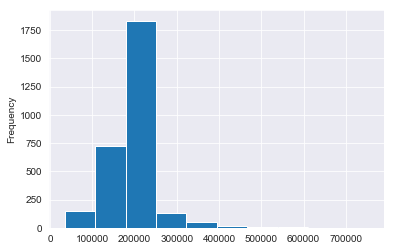

In [30]:
alldata['SalePrice'].plot(kind="hist")

We see that the distribution in target variable is not normally distributed but skewed.This is a problem because to be able run a regression model the data has to be normally distributed.Making sure all data entries are non-negative and obtaining non-linear targets.We will compute the skewness and fix the problem by using the log function +1 just in case there are values with zeros.

In [31]:
#Computing skewness along the index axis
alldata['SalePrice'].skew(axis = 0, skipna = True)

2.66096398279115

In [32]:
# fixing skewness with log function
alldata['SalePrice'] = np.log(alldata['SalePrice']+1)

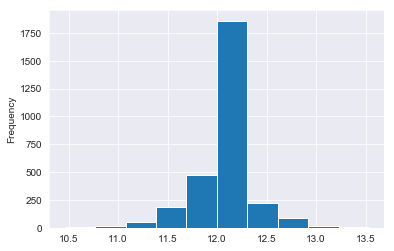

In [33]:
alldata['SalePrice'].plot(kind="hist")

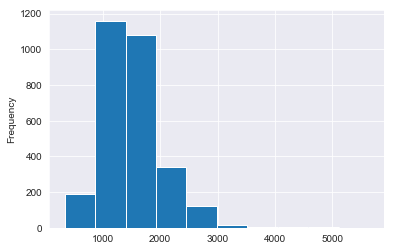

In [34]:
features['GrLivArea'].plot(kind="hist")

In [35]:
# Well will apply the log function other variables
features['GrLivArea'] = np.log(features['GrLivArea'] + 1)

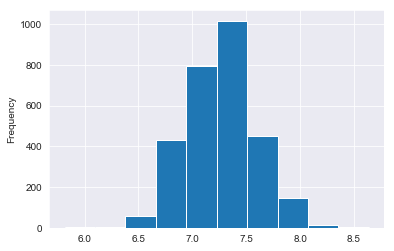

In [36]:
features['GrLivArea'].plot(kind="hist")

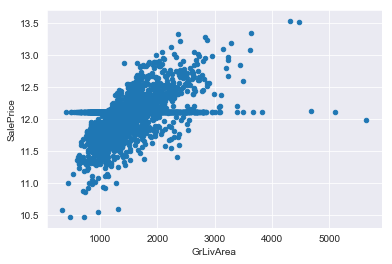

In [37]:
# Taking peek at the realtionship between the target variable and other variables
alldata.plot(kind='scatter',x = 'GrLivArea',y='SalePrice')

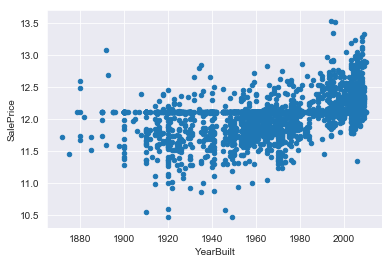

In [38]:
# the relationship between SalePrice and YearBuilt
alldata.plot(kind='scatter',x = 'YearBuilt',y='SalePrice')

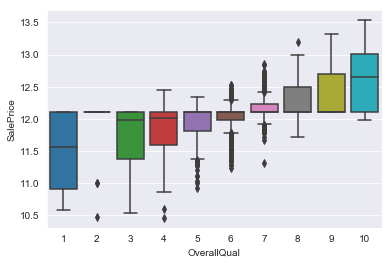

In [39]:
# The distribution of OverallQuality of the house given SalePrice
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = alldata)


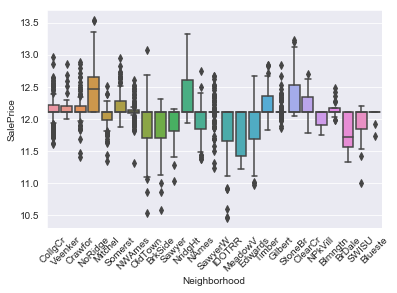

In [40]:
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = alldata)
xt = plt.xticks(rotation=45)

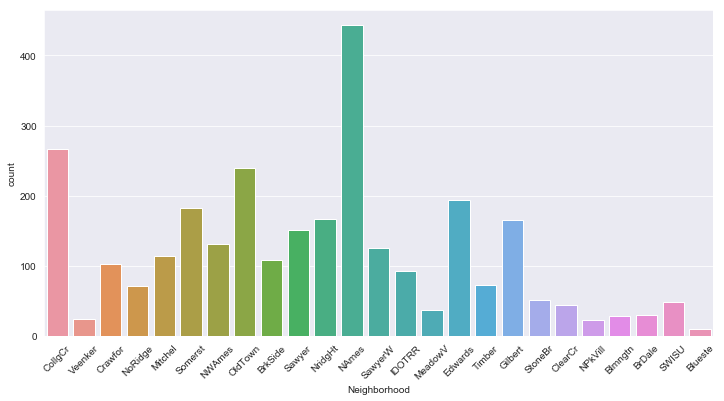

In [41]:
#What neighborhood sales more houses?
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = alldata)
xt = plt.xticks(rotation=45)

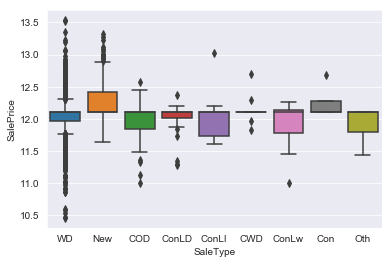

In [42]:
# SaleType distribution given SalePrice
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = alldata)

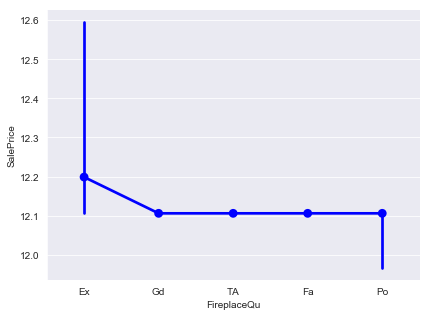

In [43]:
# Different type of Fireplace Quality and the value it adds to the price of the house
sns.factorplot('FireplaceQu', 'SalePrice', data = alldata, color = 'b', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)


# Data Engineering

Now we will do some data engineering by identifying features with strong correlation and decide whether or not we should keep the features or remove it from our analysis.Now we will run a correlation matrix.

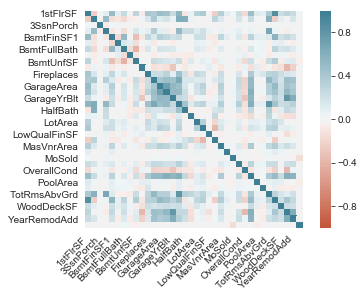

In [44]:
corr = features.corr()

ax = sns.heatmap( corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

Green says that it is postively correlated and red is negative correlation.We see that SalePrice is postively higly correlated with OverallQual,TotalBsmtSF and GrLivArea.Garagearea and GarageCars are highly postively correlated. We will remove GarageCars and so is TotalBsmtSF and 1stFlrSF we will keep TotalBsmtSF and remove 1stFlrSF.

In [45]:
# Deleting higly correlated features
del features['GarageCars']
del features['1stFlrSF']

In [46]:
# changing categorical features that seem like numerical features into a string
features['MSSubClass'] = pd.Categorical(features.MSSubClass)
features['OverallCond'] = pd.Categorical(features.OverallCond)
features['YrSold'] = pd.Categorical(features.YrSold)
features['MoSold'] = pd.Categorical(features.MoSold)

In [47]:
# Converting categorical features into dummy varibles
features = pd.get_dummies(features)

In [48]:
# Outlier
features.describe()

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
count,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,...,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000
mean,336.484,2.602,2.860,581.910,93.253,0.430,0.062,607.071,23.098,0.597,...,0.865,0.004,0.996,1.000,0.000,0.212,0.237,0.213,0.222,0.116
std,428.701,25.188,0.823,354.586,156.674,0.525,0.246,406.222,64.244,0.646,...,0.341,0.064,0.064,0.019,0.019,0.409,0.425,0.410,0.415,0.320
min,0.000,0.000,0.000,2.000,6.000,0.000,0.000,14.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,2.000,441.423,49.582,0.000,0.000,300.000,0.000,0.000,...,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,3.000,441.423,49.582,0.000,0.000,560.772,0.000,1.000,...,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,704.000,0.000,3.000,733.000,49.582,1.000,0.000,805.000,0.000,1.000,...,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2065.000,508.000,8.000,5644.000,1526.000,3.000,2.000,2336.000,1012.000,4.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [49]:
features.count()

2ndFlrSF                 2919
3SsnPorch                2919
BedroomAbvGr             2919
BsmtFinSF1               2919
BsmtFinSF2               2919
BsmtFullBath             2919
BsmtHalfBath             2919
BsmtUnfSF                2919
EnclosedPorch            2919
Fireplaces               2919
FullBath                 2919
GarageArea               2919
GarageYrBlt              2919
GrLivArea                2919
HalfBath                 2919
KitchenAbvGr             2919
LotArea                  2919
LotFrontage              2919
LowQualFinSF             2919
MasVnrArea               2919
MiscVal                  2919
OpenPorchSF              2919
OverallQual              2919
PoolArea                 2919
ScreenPorch              2919
TotRmsAbvGrd             2919
TotalBsmtSF              2919
WoodDeckSF               2919
YearBuilt                2919
YearRemodAdd             2919
                         ... 
RoofStyle_Flat           2919
RoofStyle_Gable          2919
RoofStyle_

In [50]:
labels = np.array(alldata['SalePrice'])

In [51]:
features = np.array(features)

In [52]:
#Splitting the data into training and test datasets
from sklearn.model_selection import train_test_split

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [54]:
print('train_features_shape', train_features.shape)
print('train_labels_shape', train_labels.shape)
print('test_features_shape', test_features.shape)
print('test_labels_shape', test_labels.shape)

train_features_shape (2189, 326)
train_labels_shape (2189,)
test_features_shape (730, 326)
test_labels_shape (730,)


# Creating a Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model= RandomForestRegressor(n_estimators = 1000, random_state =0)

In [57]:
# Fit on traing data
model.fit(train_features,train_labels);

In [58]:
predictions = model.predict(test_features)

In [59]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [60]:
#Print out the mean absolute errors (mae)
print('Mean Absolute Error:',round(np.mean(errors),3))

Mean Absolute Error: 0.166


In [61]:
# Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.62 %.


The accuracy is really looking great and now the model has learned to predict the sale price of the homes in Ames County at an accuracy of 99.62 %.

In [62]:
# Feature Importance
importances =list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_names, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ExterQual            Importance: 0.26
Variable: BsmtHalfBath         Importance: 0.13
Variable: FireplaceQu          Importance: 0.04
Variable: Alley                Importance: 0.03
Variable: BsmtExposure         Importance: 0.03
Variable: BsmtFinType2         Importance: 0.03
Variable: BsmtFullBath         Importance: 0.03
Variable: CentralAir           Importance: 0.03
Variable: Condition1           Importance: 0.03
Variable: 1stFlrSF             Importance: 0.02
Variable: ExterCond            Importance: 0.02
Variable: Foundation           Importance: 0.02
Variable: 3SsnPorch            Importance: 0.01
Variable: BsmtFinSF1           Importance: 0.01
Variable: BsmtFinType1         Importance: 0.01
Variable: Electrical           Importance: 0.01
Variable: Fence                Importance: 0.01
Variable: Fireplaces           Importance: 0.01
Variable: FullBath             Importance: 0.01
Variable: 2ndFlrSF             Importance: 0.0
Variable: BedroomAbvGr         Importance

In answer to the business question of what features greatly influence the SalePrice of a house in Ames county Iowa.We can confidently say that the most influencial is ExterQual which evaluates the quality of the material on the exterior which is quiet logical. Can easily spot a good house by the quality of the exterior.it makes so much sense. The second influencial feature is BsmtHalfBath meaning having a halfbathroom in the basement. Thats streng but i guess a bathroon in the basement in Ames County is a big deal.Now we will run another model based on feature importance.  

In [63]:
# Random forest with important features
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=0)

In [64]:
important_indices = [features_names.index('BsmtHalfBath')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [65]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
predictions = rf_most_important.predict(test_important)

In [67]:
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 0.17
Accuracy: 98.621 %.


SVM will not work since the train_labels are continuous values. Classifiers will not operate on continous values.Therefore it was a better choice to have used regressors from random forest. 